# Biodiversity Intactness Index Change in Phoenix, Arizona

**Author:** Aakriti Poudel

**GitHub Repository:** https://github.com/aakriti-poudel-chhetri/biodiversity-intactness-index-phoenix

# About

## Purpose
The analysis in this notebook examines how rapid urban expansion in Maricopa County, particularly within the Phoenix metropolitan area, has affected local biodiversity. By analyzing changes in the Biodiversity Intactness Index (BII) for county subdivisions between 2017 and 2020, this study aims to quantify the impact of increased development on ecosystem health and species richness. The findings will help highlight areas where urban growth has reduced biodiversity and provide insights that can inform sustainable urban planning and conservation strategies.

## Highlights

The key highlights of this analysis is to:

- Measure the area of the Phoenix subdivision with high BII (≥ 0.75) and track changes between 2017 and 2020
- Quantify the effects of rapid urban expansion on local ecosystems by analyzing changes in BII values, species richness and habitat integrity using spatial raster data
- Highlight regions within Phoenix where biodiversity has declined most, focusing on areas under ecological stress.
- Create maps showing BII distribution, areas of biodiversity loss and the Phoenix subdivision to support analysis and interpretation

## About the data

For this analysis, two primary datasets are used.

**Biodiversity Intactness Index (BII) Time Series**
This dataset is retrieved from the Microsoft Planetary Computer STAC catalog. The dataset includes raster covering the Phoenix subdivision from 2017 and 2020. These rasters measure how intact ecosystems are compared to their natural state, providing a way to track changes in biodiversity over time. The analysis is limited to the area defined by the coordinates [-112.826843, 32.974108, -111.184387, 33.863574], covering all of the Phoenix subdivision.

**Phoenix Subdivision Shapefile** 
This dataset is retrieved from Phoenix subdivision shapefile, downloaded from the Census County Subdivision files for Arizona. This shapefile provides polygon geometries for the county subdivisions, enabling spatial analysis and mapping of the BII data within the exact boundaries of Phoenix. To enhance visualization and context, shapefiles are used to show the Phoenix subdivision in relation to surrounding areas, helping to better understand the geographic distribution of biodiversity changes.

## References
Microsoft Planetary Computer. (n.d.). *Biodiversity Intactness*. Retrieved December 5, 2025, from https://planetarycomputer.microsoft.com/dataset/io-biodiversity#overview

US Census Bureau. (2025b, November 26). TIGER/Line shapefiles. Census.gov. https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html#list-tab-790442341

# Data exploration, analysis and visualization

## Import libraries

Let's start by importing all the necessary libraries.

In [33]:
import pandas as pd
import geopandas as gpd
#import xarray as xr
import rioxarray as rioxr
import contextily as ctx
import matplotlib.pyplot as plt

import pystac_client
from pystac_client import Client

import planetary_computer
from IPython.display import Image 

## Access 'io-biodiversity' collection from the Microsoft Planetary Computer STAC Catalog

Here, we connect to the Microsoft Planetary Computer data catalog and perform the search. We access the Biodiversity Intactness Index (BII) raster datasets for 2017 and 2020.

In [2]:
# Open Microsoft Planetary Computer STAC catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier = planetary_computer.sign_inplace
)

# Define bounding box for Phoenix
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# Access the BII data
search = catalog.search(
    collections = ["io-biodiversity"],
    bbox = bbox
)

# Retrieve search items
items = search.item_collection()
print(f"Returned: {len(items)} items")
items

#Check items
for item in items:
    print(f"Item ID: {item.id}, Datetime: {item.datetime}")

Returned: 4 items
Item ID: bii_2020_34.74464974521749_-115.38597824385106_cog, Datetime: None
Item ID: bii_2019_34.74464974521749_-115.38597824385106_cog, Datetime: None
Item ID: bii_2018_34.74464974521749_-115.38597824385106_cog, Datetime: None
Item ID: bii_2017_34.74464974521749_-115.38597824385106_cog, Datetime: None


**Check item and render preview for the year 2017.**

In [3]:
# Select items for year 2017 
item2017 = items[0]

# Display pre-rendered image for 2017
Image(url=item2017.assets['rendered_preview'].href, width=600)

**Open and explore the raster for 2017.**

In [4]:
# Access raster data from 2017 item
raster2017 = rioxr.open_rasterio(item2017.assets['data'].href)
raster2017

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

**Check item and render preview for the year 2020.**

In [5]:
# Select items for year 2020
item2020 = items[3]

# Display pre-rendered image for 2020
Image(url=item2020.assets['rendered_preview'].href, width=600)

**Open and explore the raster for 2020.**

In [11]:
# Access raster data from 2020 item
raster2020 = rioxr.open_rasterio(item2020.assets['data'].href)
raster2020

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

**Check CRS for both 2017 and 2020 raster.**

In [12]:
# Check CRS of both rasters
print(raster2017.rio.crs)
print(raster2020.rio.crs)

EPSG:4326
EPSG:4326


#### Summary of the BII data exploartion data exploration

A search of the Microsoft Planetary Computer STAC catalog for Biodiversity Intactness Index (BII) data over the Phoenix bounding box returned 4 items from 2017 to 2020. Each item corresponds to a BII dataset for a specific year, though the datetime field is not set. The 2017 and 2020 raster displays correctly in the pre-rendered preview. The inspection of raster data shows that both the 2017 and 2020 rasters use the WGS84 coordinate system (EPSG:4326).

## Load Phoenix subdivision shapefile

We load the shapefile for the Phonenix subdivision.

In [6]:
# Load the Arizona state subdivision shapefiles
arizona = gpd.read_file('data/tl_2020_04_cousub/tl_2020_04_cousub.shp')

**Filter the subdivision shapefile to the area of our interest, Phoenix.**

In [20]:
# Filter for the Phoenix subdivision shapefiles
phoenix = arizona[arizona['NAME'] == 'Phoenix'].copy()
phoenix

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
46,04,013,92601,01934968,0401392601,Phoenix,Phoenix CCD,22,Z5,G4040,None,None,None,S,2805901266,10048820,+33.5211331,-112.0284405,"POLYGON ((-112.47014 33.55996, -112.47011 33.5..."


<Axes: >

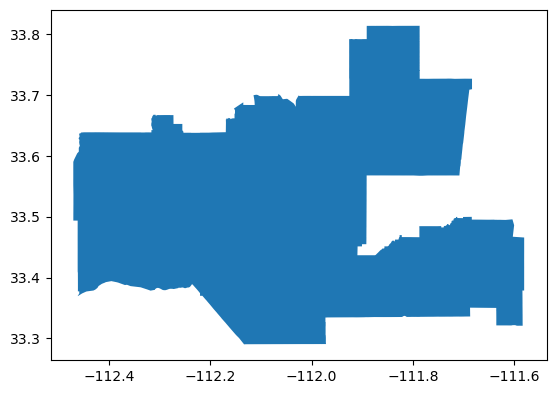

In [23]:
# Plot the Phoenix subdivision shapefile
phoenix.plot()

**Check the CRS of the Phoenix subdivision shapefile and reproject if necessary.**

In [18]:
# Check the CRS of the subdivision shapefile
print(f"The original CRS of the Phoenix subdivision shapefile is: {phoenix.crs}")
print("Is CRS geographic?", phoenix.crs.is_geographic)

# Reproject the Phoenix CRS to match the CRS of BII 2017 and 2020 rasters (EPSG:4326)
phoenix_rpj = phoenix.to_crs('EPSG:4326')
print(f"The reprojected CRS of Phoenix subdivision shapefile is: {phoenix_rpj.crs}")

The original CRS of the Phoenix subdivision shapefile is: EPSG:4269
Is CRS geographic? True
The reprojected CRS of Phoenix subdivision shapefile is: EPSG:4326


**Check whether geometries are valid or invalid.**

In [9]:
# Check geometry validity
phoenix["is_valid"] = phoenix.geometry.is_valid
print("Invalid geometries:", phoenix[~phoenix.is_valid])

Invalid geometries: Empty GeoDataFrame
Columns: [STATEFP, COUNTYFP, COUSUBFP, COUSUBNS, GEOID, NAME, NAMELSAD, LSAD, CLASSFP, MTFCC, CNECTAFP, NECTAFP, NCTADVFP, FUNCSTAT, ALAND, AWATER, INTPTLAT, INTPTLON, geometry, is_valid]
Index: []


#### Summary of the subdivision shapefile data exploration

The Phoenix subdivision shapefile originally uses EPSG:4269 as its coordinate reference system. To match the CRS of the 2017 and 2020 rasters, we reprojected the shapefile to EPSG:4326. All geometries in the shapefile are valid, as the validity check returned no invalid features.

## Phoenix subdivision within its broader geographic context

Create a map of the Phoenix subdivision within its broader geographic context. This visualization uses an OpenStreetMap.Mapnik base map for geographic reference and outlines the Phoenix subdivision boundary.

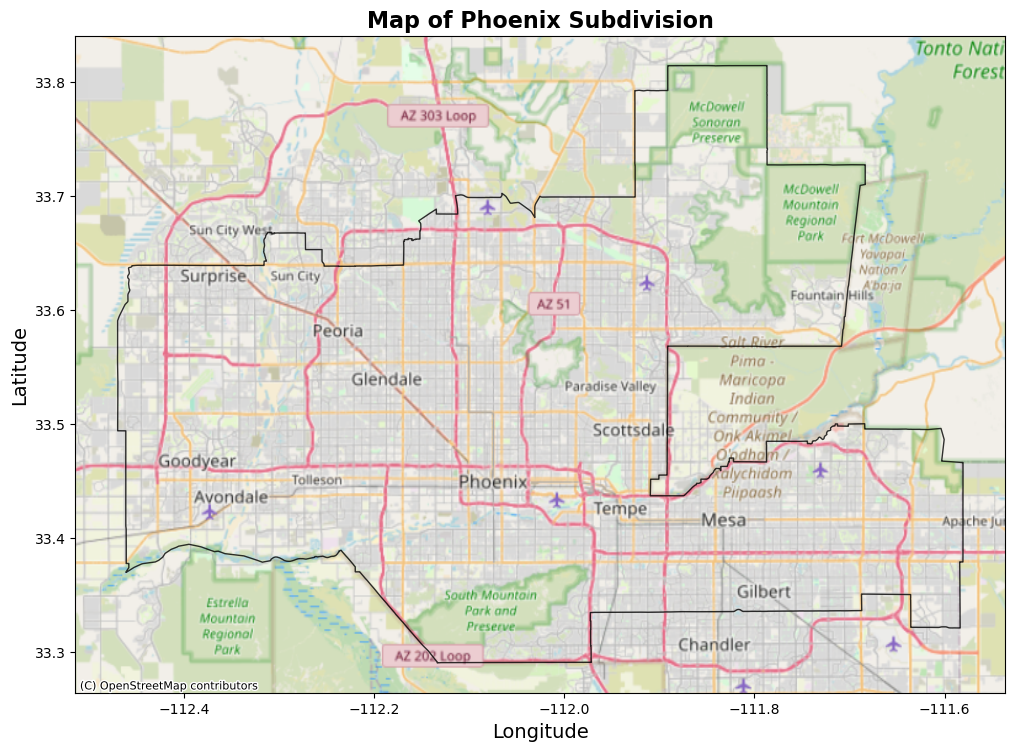

In [40]:
# Visualize the Phoenix subdivision using basemap
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Phoenix subdivision
phoenix.plot(ax=ax,
                 facecolor='none',
                 alpha=0.8,
                 edgecolor='black',
                 linewidth=1)

# Add basemap to the Phoenix subdivision
ctx.add_basemap(ax, crs=phoenix.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Set title, x axis label and y axis label

ax.set_title('Map of Phoenix Subdivision', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

plt.show()